In [124]:
# 2019년 코드 (셀 1)
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat as py
import plotly.express as px
import matplotlib as mpl
import matplotlib.lines as mlines


# 2023년 코드 (셀 1)
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat as py

import matplotlib.pyplot as plt

plt.rcParams.update({'font.family' : "Malgun Gothic"})


In [125]:
# 2019년 코드 (셀 2)
# 데이터 불러오기
raw_welfare_2019 =pd.read_spss('D:/한국인의삶 백업폴더/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare_2019 =raw_welfare_2019.copy()
welfare_2019.head()

# 2023년 코드 (셀 2)
# 데이터 불러오기
raw_welfare_2023 =pd.read_spss('D:/한국인의삶 백업폴더/Koweps_hpda18_2023_beta1.sav')

# 복사본 만들기
welfare_2023 =raw_welfare_2023.copy()
welfare_2023.head()

,h18_id,h18_ind,h18_sn,h18_merkey,h_new,h_new1,h18_cobf,p18_wsc,p18_wsl,p18_wgc,...,da18_324,da18_325,da18_326,da18_327,da18_6aq14,h18_pers_income1,h18_pers_income2,h18_pers_income3,h18_pers_income4,h18_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,0.0,NaN,0.256182,0.259465,1353.065043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,0.0,NaN,0.480753,0.397864,2539.170017,...,NaN,NaN,NaN,NaN,NaN,NaN,2160.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,0.0,NaN,0.232618,0.220094,1228.608612,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.591596,0.524757,3124.604491,...,NaN,NaN,NaN,NaN,NaN,3020.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.940481,0.858730,4967.289420,...,NaN,NaN,NaN,NaN,NaN,NaN,914.0,NaN,0.0,NaN


In [126]:
# 2019년 코드 (셀 3)
# 데이터 검토
# welfare_2019 # 앞부분, 뒷부분 확인
#welfare_2019.shape # 행,열의 갯수
#welfare_2019.info() # 열의 속성
#welfare_2019.describe() #요약 통계
#welfare_2019.head()

# 2023년 코드 (셀 3)
# 데이터 검토
# welfare_2023 # 앞부분, 뒷부분 확인
#welfare_2023.shape # 행,열의 갯수
#welfare_2023.info() # 열의 속성
#welfare_2023.describe() #요약 통계
#welfare_2023.head()


In [127]:
# 2019년 코드 (셀 4)
# 분석에 필요한 열을 결정/ 열이름 변경
welfare_2019 =welfare_2019.rename(
    columns={'h14_g3'    : 'sex19',            #성별
             'h14_g4'    : 'birth19',          #태어난 년도
             'h14_g10'   : 'marriage_type19',  #혼인 상태
             'h14_g11'   : 'religion19',       #종교
             'p1402_8aq1': 'income19',         #월급
             'h14_eco9'  : 'code_job19',       #직업코드
             'h14_reg7'  : 'code_region19'})   #지역 코드

# 2023년 코드 (셀 4)
# 분석에 필요한 열을 결정/ 열이름 변경
welfare_2023 =welfare_2023.rename(
    columns={'h18_g3'    : 'sex23',            #성별
             'h18_g4'    : 'birth23',          #태어난 년도
             'h18_g10'   : 'marriage_type23',  #혼인 상태
             'h18_g11'   : 'religion23',       #종교
             'p1802_8aq1': 'income23',         #월급
             'h18_eco9'  : 'code_job23',       #직업코드
             'h18_reg7'  : 'code_region23'})   #지역 코드

In [128]:
# 2019년 코드 (셀 5)
# 성별 변수 검토 및 전처리
print(welfare_2019['sex19'].dtype) # 타입 출력

# 2023년 코드 (셀 5)
# 성별 변수 검토 및 전처리
print(welfare_2023['sex23'].dtype) # 타입 출력

float64
float64


In [129]:
# 2019년 코드 (셀 6)
print(welfare_2019['sex19'].value_counts()) #빈도수

# 2023년 코드 (셀 6)
print(welfare_2023['sex23'].value_counts()) #빈도수

sex19
2.0    7913
1.0    6505
Name: count, dtype: int64
sex23
2.0    8787
1.0    7144
Name: count, dtype: int64


In [130]:
# 2019년 코드 (셀 7)
# 이상치 결측 처리
welfare_2019['sex19'] =np.where(welfare_2019['sex19'] ==9, np.nan, welfare_2019['sex19'])

# 결측 확인 #loc<< 이거 행 변경 기억하기.
welfare_2019['sex19'].isna().sum()

# 2023년 코드 (셀 7)
# 이상치 결측 처리
welfare_2023['sex23'] =np.where(welfare_2023['sex23'] ==9, np.nan, welfare_2023['sex23'])

# 결측 확인 #loc<< 이거 행 변경 기억하기.
welfare_2023['sex23'].isna().sum()

np.int64(0)

In [131]:
# 2019년 코드 (셀 8)
# 성별 항목 이름 부여
welfare_2019['sex19']= np.where(welfare_2019['sex19'] == 1, 'male','female')

#빈도구하기
print(welfare_2019['sex19'].value_counts())

# 2023년 코드 (셀 8)
# 성별 항목 이름 부여
welfare_2023['sex23']= np.where(welfare_2023['sex23'] == 1, 'male','female')

#빈도구하기
print(welfare_2023['sex23'].value_counts())

sex19
female    7913
male      6505
Name: count, dtype: int64
sex23
female    8787
male      7144
Name: count, dtype: int64


<Axes: xlabel='sex19', ylabel='count'>

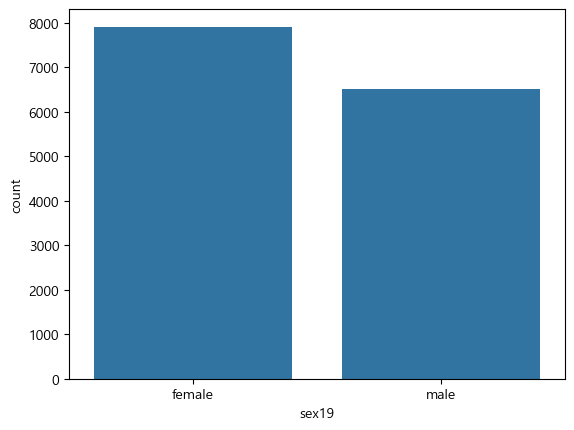

In [132]:
# 2019년 코드 (셀 9)
# 빈도 막대 그래프 # seaborn을 쓰고있다는것 map plot을 안쓰고있고
sns.countplot(data =welfare_2019, x='sex19') 


<Axes: xlabel='sex23', ylabel='count'>

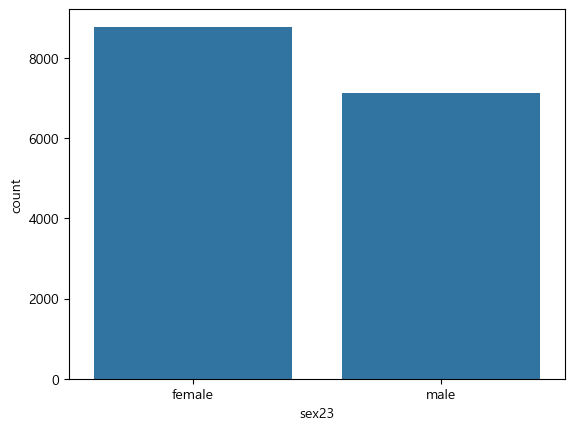

In [133]:

# 2023년 코드 (셀 9)
# 빈도 막대 그래프 # seaborn을 쓰고있다는것 map plot을 안쓰고있고
sns.countplot(data =welfare_2023, x='sex23') 

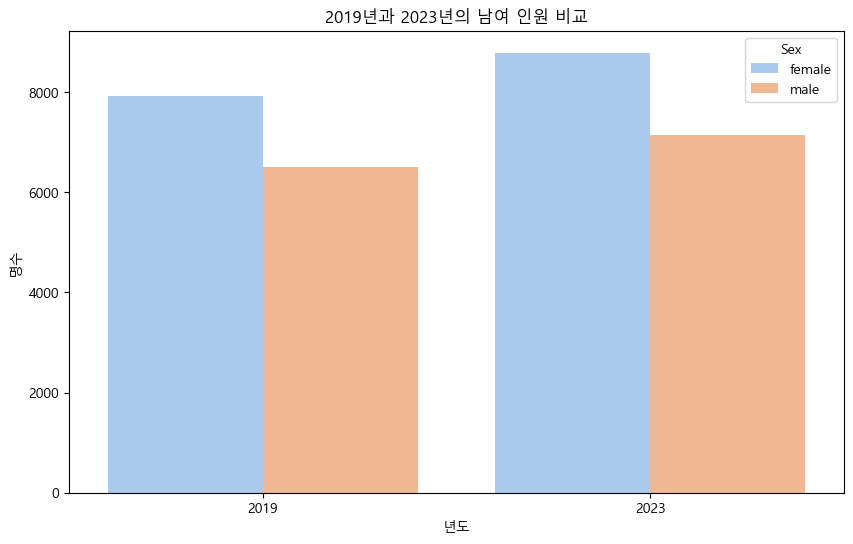

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 (데이터 로드 필요)
# welfare_2019 = pd.read_csv('welfare_2019.csv')  # 2019년 데이터 로드
# welfare_2023 = pd.read_csv('welfare_2023.csv')  # 2023년 데이터 로드

# 2019년 성별 데이터 처리
count_2019 = welfare_2019['sex19'].value_counts().reset_index()
count_2019.columns = ['Sex', 'Count']
count_2019['Year'] = '2019'

# 2023년 성별 데이터 처리
count_2023 = welfare_2023['sex23'].value_counts().reset_index()
count_2023.columns = ['Sex', 'Count']
count_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([count_2019, count_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Year', y='Count', hue='Sex', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 남여 인원 비교')
plt.xlabel('년도')
plt.ylabel('명수')

# 차트 표시
plt.show()


In [135]:
# 2019년 코드 (셀 10)
# 월급 # 변수 타입 출력
print(welfare_2019['income19'].dtype)

# 2023년 코드 (셀 10)
# 월급 # 변수 타입 출력
print(welfare_2023['income23'].dtype)

float64
float64


<Axes: xlabel='income19', ylabel='Count'>

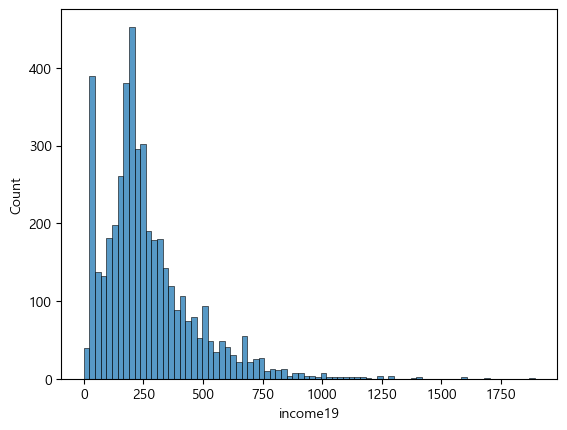

In [136]:
# 2019년 코드 (셀 11)
sns.histplot(data=welfare_2019, x='income19')


<Axes: xlabel='income23', ylabel='Count'>

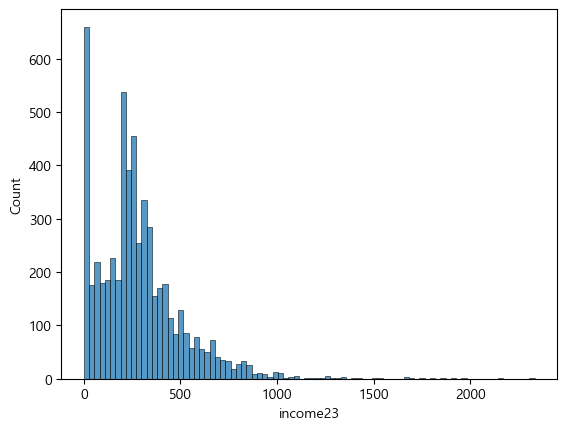

In [137]:

# 2023년 코드 (셀 11)
sns.histplot(data=welfare_2023, x='income23')

In [138]:

# # 일반 박스플롯 그래프
# # welfare_2019 = pd.read_csv('welfare_2019.csv')  # 2019년 데이터 로드
# # welfare_2023 = pd.read_csv('welfare_2023.csv')  # 2023년 데이터 로드

# # 2019년 수입 데이터 처리
# income_2019 = welfare_2019['2019_income'].dropna()
# income_2019_df = pd.DataFrame({
#     'Income': income_2019,
#     'Year': '2019'
# })

# # 2023년 수입 데이터 처리
# income_2023 = welfare_2023['2023_income'].dropna()
# income_2023_df = pd.DataFrame({
#     'Income': income_2023,
#     'Year': '2023'
# })

# # 두 데이터프레임 병합
# comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# # 상자 그래프 생성
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# # 차트 제목 및 레이블 설정
# plt.title('Income Distribution Comparison for 2019 and 2023')
# plt.xlabel('Year')
# plt.ylabel('Income')

# # 차트 표시
# plt.show()


C:\Users\04-09\AppData\Local\Temp\ipykernel_5256\3900638554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')


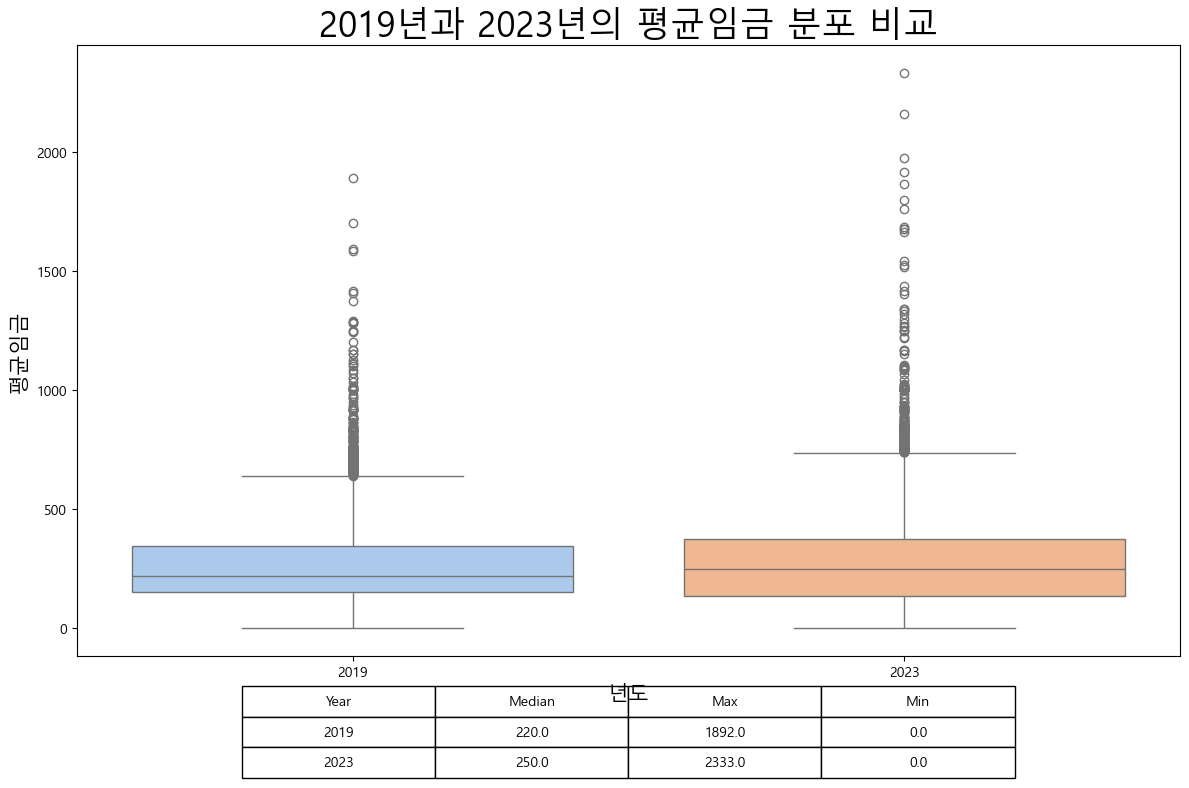

In [139]:
# 2019년 수입 데이터 처리
income_2019 = welfare_2019['income19'].dropna()
income_2019_df = pd.DataFrame({
    'Income': income_2019,
    'Year': '2019'
})

# 2023년 수입 데이터 처리
income_2023 = welfare_2023['income23'].dropna()
income_2023_df = pd.DataFrame({
    'Income': income_2023,
    'Year': '2023'
})

# 두 데이터프레임 병합
comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# 상자 그래프 생성
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# 중앙값, 최대값, 최소값 계산
stats = comparison_df.groupby('Year')['Income'].agg(['median', 'max', 'min']).reset_index()

# 데이터 테이블 생성
table_data = []
for _, row in stats.iterrows():
    table_data.append([row['Year'], row['median'], row['max'], row['min']])

# 데이터 테이블 추가
table = plt.table(cellText=table_data,
                  colLabels=['Year', 'Median', 'Max', 'Min'],
                  cellLoc='center',
                  loc='upper center',
                  bbox=[0.15, -0.2, 0.7, 0.15])  # 위치 조정

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 평균임금 분포 비교', fontsize = 25)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('평균임금', fontsize = 15)

# 그래프 레이아웃 조정
plt.tight_layout()

# 차트 표시
plt.show()

C:\Users\04-09\AppData\Local\Temp\ipykernel_5256\3732772269.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')


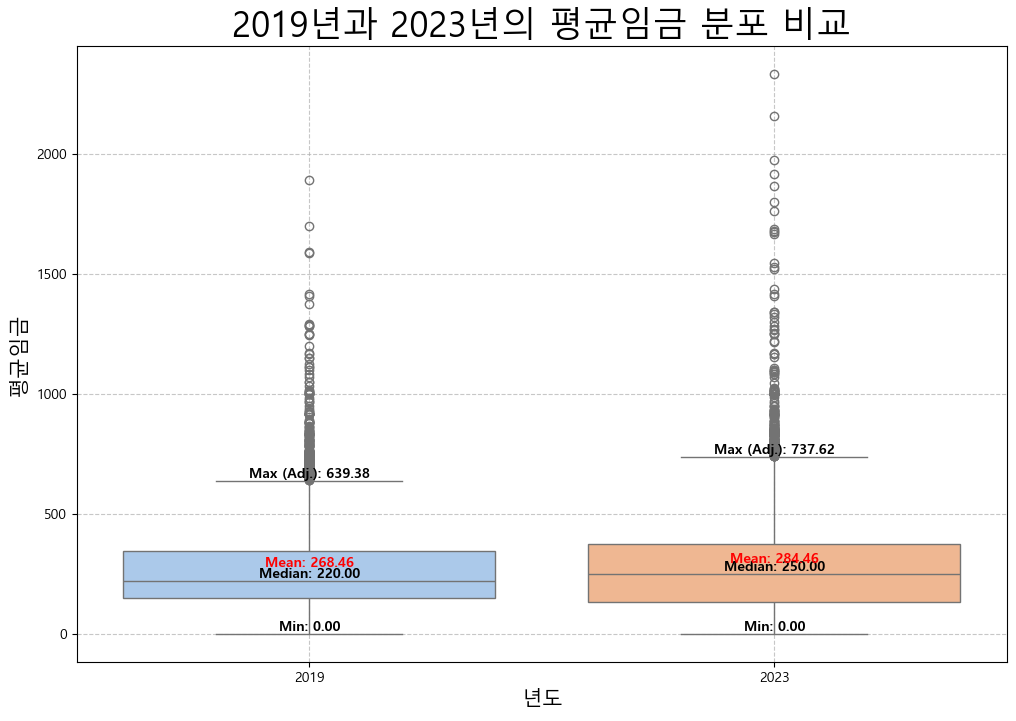

In [140]:
# 2019년 수입 데이터 처리
income_2019 = welfare_2019['income19'].dropna()
income_2019_df = pd.DataFrame({
    'Income': income_2019,
    'Year': '2019'
})

# 2023년 수입 데이터 처리
income_2023 = welfare_2023['income23'].dropna()
income_2023_df = pd.DataFrame({
    'Income': income_2023,
    'Year': '2023'
})

# 두 데이터프레임 병합
comparison_df = pd.concat([income_2019_df, income_2023_df], ignore_index=True)

# 상자 그래프 생성
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=comparison_df, x='Year', y='Income', palette='pastel')

# 중앙값, 최대값, 최소값 및 Q1, Q3, IQR 계산
for year in comparison_df['Year'].unique():
    data = comparison_df[comparison_df['Year'] == year]['Income']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    median = data.median()
    mean = data.mean()
    min = row['min']
    max = Q3 + 1.5 * IQR
    
    # 값 표시
    ax.text(year, median, f'Median: {median:.2f}', color='black', ha='center', va='bottom', fontsize=10, weight='bold')
    ax.text(year, mean, f'Mean: {mean:.2f}', color='red', ha='center', va='bottom', fontsize=10, weight='bold')

    ax.text(year, min, f'Min: {min:.2f}', color='black', ha='center', va='bottom', fontsize=10, weight='bold')
    ax.text(year, max, f'Max (Adj.): {max:.2f}', color='black', ha='center', va='bottom', fontsize=10, weight='bold')

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년의 평균임금 분포 비교', fontsize = 25)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('평균임금', fontsize = 15)

# 그래프의 그리드 선 추가
ax.grid(True, linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

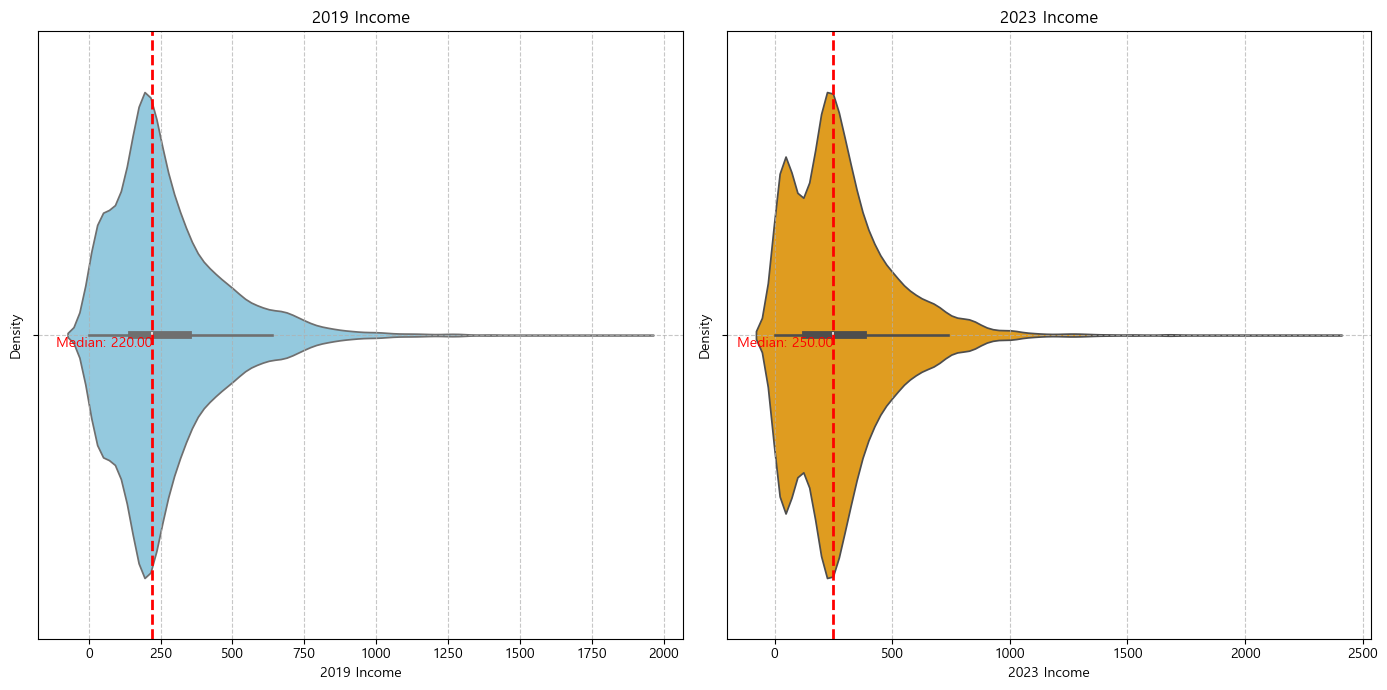

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 2019년 데이터의 바이올렛 플롯 생성
sns.violinplot(data=welfare_2019, x="income19", ax=axes[0], color='skyblue')
axes[0].set_title("2019 Income")
axes[0].set_xlabel("2019 Income")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle='--', alpha=0.7)  # 그리드선 추가

# 중앙값 계산 및 표시
median_2019 = welfare_2019['income19'].median()
axes[0].axvline(median_2019, color='red', linestyle='--', linewidth=2)
axes[0].text(median_2019, 0.02, f'Median: {median_2019:.2f}', color='red', 
             horizontalalignment='right', fontsize=10)

# 2023년 데이터의 바이올렛 플롯 생성
sns.violinplot(data=welfare_2023, x="income23", ax=axes[1], color='orange')
axes[1].set_title("2023 Income")
axes[1].set_xlabel("2023 Income")
axes[1].set_ylabel("Density")
axes[1].grid(True, linestyle='--', alpha=0.7)  # 그리드선 추가

# 중앙값 계산 및 표시
median_2023 = welfare_2023['income23'].median()
axes[1].axvline(median_2023, color='red', linestyle='--', linewidth=2)
axes[1].text(median_2023, 0.02, f'Median: {median_2023:.2f}', color='red', 
             horizontalalignment='right', fontsize=10)

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [142]:
# 2019년 코드 (셀 12)
print(welfare_2019['income19'].describe()) #이상치확인

# 2023년 코드 (셀 12)
print(welfare_2023['income23'].describe()) #이상치확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income19, dtype: float64
count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income23, dtype: float64


In [143]:
# 2019년 코드 (셀 13)
print(welfare_2019['income19'].isna().sum()) # 결측지 확인

# 2023년 코드 (셀 13)
print(welfare_2023['income23'].isna().sum()) # 결측지 확인

9884
10301


In [144]:
# 2019년 코드 (셀 14)
# 이상치 결측 처리
welfare_2019['income19'] =np.where(welfare_2019['income19'] == 9999, np.nan,welfare_2019['income19'])
# 결측치 확인
print(welfare_2019['income19'].isna().sum())

# 2023년 코드 (셀 14)
# 이상치 결측 처리
welfare_2023['income23'] =np.where(welfare_2023['income23'] == 9999, np.nan,welfare_2023['income23'])
# 결측치 확인
print(welfare_2023['income23'].isna().sum())

9884
10301


In [164]:
# 2019년 코드 (셀 15)
# 성별 월급 평균
sex_income19 =welfare_2019.dropna(subset=['income19']) \
                   .groupby('sex19',as_index=False) \
                   .agg(mean_income = ('income19', 'mean'))  
sex_income19 


,sex19,mean_income
0,Female,3000.0
1,Male,3500.0


In [165]:

# 2023년 코드 (셀 15)
# 성별 월급 평균
sex_income23 =welfare_2023.dropna(subset=['income23']) \
                   .groupby('sex23',as_index=False) \
                   .agg(mean_income = ('income23', 'mean'))  
sex_income23

,sex23,mean_income
0,Female,3200.0
1,Male,4000.0


In [147]:

# # 2023년 코드 (셀 15)
# # 성별 월급 평균
# # sex_income =welfare_2023.dropna(subset=['income23']) \
#                    .groupby('2023_sex',as_index=False) \
#                    .agg(mean_income = ('income23', 'mean'))  
# sex_income   

<Axes: xlabel='sex23', ylabel='mean_income'>

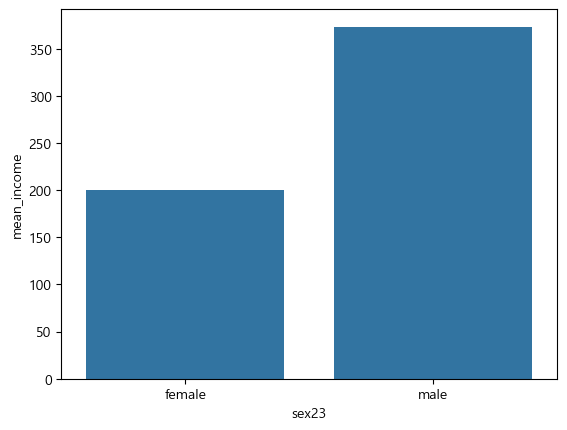

In [162]:
# 2023년 코드 (셀 16)
sns.barplot(data=sex_income, x= 'sex23', y='mean_income')


In [163]:

# 2019년 코드 (셀 16)
sns.barplot(data=sex_income, x='sex19', y='mean_income')

ValueError: Could not interpret value `sex19` for `x`. An entry with this name does not appear in `data`.

Comparison of Average Income by Gender in 2019 and 2023

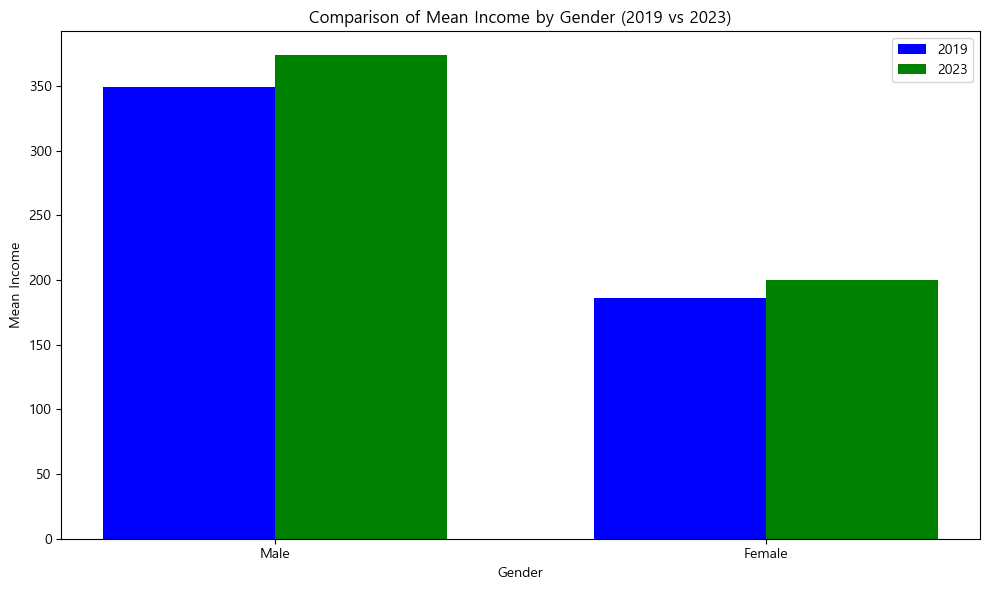

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for 2019 and 2023 mean incomes by sex
data_2019 = {'sex19': ['Male', 'Female'], 'mean_income': [349.037571, 186.293096]}
data_2023 = {'sex23': ['Male', 'Female'], 'mean_income': [373.581565, 200.327693]}

# Creating DataFrames
df_2019 = pd.DataFrame(data_2019)
df_2023 = pd.DataFrame(data_2023)

# Merging the two dataframes on the sex columns
df_merged = pd.merge(df_2019, df_2023, left_on='sex19', right_on='sex23')

# Plotting the bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(df_merged))

plt.bar(index, df_merged['mean_income_x'], bar_width, label='2019', color='b')
plt.bar([i + bar_width for i in index], df_merged['mean_income_y'], bar_width, label='2023', color='g')

plt.xlabel('Gender')
plt.ylabel('Mean Income')
plt.title('Comparison of Mean Income by Gender (2019 vs 2023)')
plt.xticks([i + bar_width/2 for i in index], df_merged['sex19'])
plt.legend()

plt.tight_layout()
plt.show()



In [151]:
# 2019년 성별별 평균 수입 계산
mean_income_2019 = welfare_2019.groupby('sex19')['income19'].mean().reset_index()
mean_income_2019.columns = ['Sex19', 'Mean_Income19']
mean_income_2019['Year'] = '2019'

# 2023년 성별별 평균 수입 계산
mean_income_2023 = welfare_2023.groupby('sex23')['income23'].mean().reset_index()
mean_income_2023.columns = ['Sex23', 'Mean_Income23']
mean_income_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([mean_income_2019, mean_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Year', y='Mean_Income', hue='Sex', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('Comparison of Average Income by Gender in 2019 and 2023')
plt.xlabel('Year')
plt.ylabel('Mean Income')

# 차트 표시
plt.show()

ValueError: Could not interpret value `Mean_Income` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

2023년과 2019년도의 남/녀 평균 소득 차이
Comparison of Average Income by Gender in 2019 and 2023

In [ ]:
# 2019년 성별별 평균 수입 계산
mean_income_2019 = welfare_2019.groupby('2019_sex')['2019_income'].mean().reset_index()
mean_income_2019.columns = ['Sex', 'Mean_Income']
mean_income_2019['Year'] = '2019'

# 2023년 성별별 평균 수입 계산
mean_income_2023 = welfare_2023.groupby('2023_sex')['2023_income'].mean().reset_index()
mean_income_2023.columns = ['Sex', 'Mean_Income']
mean_income_2023['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([mean_income_2019, mean_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Sex', y='Mean_Income', hue='Year', palette='pastel')

# 차트 제목 및 레이블 설정
plt.title('Comparison of Average Income by Gender in 2019 and 2023')
plt.xlabel('Year')
plt.ylabel('Mean Income')

# 차트 표시
plt.show()

In [ ]:
# 2019년 코드 (셀 17)
# 나이와 월급
welfare_2019['2019_birth'].dtype

# 2023년 코드 (셀 17)
# 나이와 월급
welfare_2023['2023_birth'].dtype

In [ ]:
# 2019년 코드 (셀 18)
# 요약 통계
print(welfare_2019['2019_birth'].describe)

# 2023년 코드 (셀 18)
# 요약 통계
welfare_2023['2023_birth'].describe()

In [ ]:
# 2019년 코드 (셀 19)
sns.histplot(data=welfare_2019, x= '2019_birth')


In [ ]:

# 2023년 코드 (셀 19)
sns.histplot(data=welfare_2023, x= '2023_birth')

In [ ]:
# 데이터 준비
welfare_2019['Year'] = '2019'
welfare_2023['Year'] = '2023'

# 필요한 열만 선택하고 열 이름을 일치시킵니다
data_2019 = welfare_2019[['2019_birth', 'Year']].rename(columns={'2019_birth': 'Birth_Year'})
data_2023 = welfare_2023[['2023_birth', 'Year']].rename(columns={'2023_birth': 'Birth_Year'})

# 두 데이터프레임 병합
combined_df = pd.concat([data_2019, data_2023], ignore_index=True)

# 히스토그램 생성
fig = px.histogram(combined_df, x='Birth_Year', color='Year', 
                   labels={'Birth_Year': 'Birth Year', 'Year': 'Year'},
                   title='Distribution of Birth Year in 2019 and 2023',
                   barmode='overlay')

# 차트 표시
fig.show()

In [ ]:
# 2019년 코드 (셀 20)
# 전처리
welfare_2019['2019_birth'].describe() #이상치 확인

# 2023년 코드 (셀 20)
# 전처리
welfare_2023['2023_birth'].describe() #이상치 확인

In [ ]:
# 2019년 코드 (셀 21)
#결측치 확인
welfare_2019['2019_birth'].isna().sum()

# 2023년 코드 (셀 21)
#결측치 확인
welfare_2023['2023_birth'].isna().sum()

In [ ]:
# 2019년 코드 (셀 22)
# 이상치 결측 처리
welfare_2019['2019_birth'] =np.where(welfare_2019['2019_birth'] == 9999, np.nan, welfare_2019['2019_birth'])
# 결측치 확인
welfare_2019['2019_birth'].isna().sum()

# 2023년 코드 (셀 22)
# 이상치 결측 처리
welfare_2023['2023_birth'] =np.where(welfare_2023['2023_birth'] == 9999, np.nan, welfare_2023['2023_birth'])
# 결측치 확인
welfare_2023['2023_birth'].isna().sum()

In [ ]:
# 2019년 코드 (셀 23)
# assign 삽입
welfare_2019 = welfare_2019.assign(age=2019 - welfare_2019['2019_birth'] + 1)
welfare_2019['age'].describe()



In [ ]:

# 2023년 코드 (셀 23)
# assign 삽입
welfare_2023=welfare_2023.assign(age=2023 - welfare_2023['2023_birth'] + 1)
welfare_2023['age'].describe()


In [ ]:
# 2019년 코드 (셀 24)
sns.histplot(data=welfare_2019, x= 'age')


In [ ]:

# 2023년 코드 (셀 24)
sns.histplot(data=welfare_2023, x= 'age')


In [ ]:
# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 제대로 표시

# 연령대별 빈도수 집계
age_dist_2019 = welfare_2019['age'].value_counts().reset_index()
age_dist_2019.columns = ['age', 'Count']
age_dist_2019['Year'] = '2019'

age_dist_2023 = welfare_2023['age'].value_counts().reset_index()
age_dist_2023.columns = ['age', 'Count']
age_dist_2023['Year'] = '2023'

# 두 데이터프레임 병합
age_dist_combined = pd.concat([age_dist_2019, age_dist_2023], ignore_index=True)

# 정렬된 연령대 리스트 (공통된 연령대를 기준으로 정렬)
age_order = sorted(age_dist_combined['age'].unique(), key=lambda x: int(x))

# 차트 생성
plt.figure(figsize=(14, 7))
sns.barplot(data=age_dist_combined, x='age', y='Count', hue='Year', palette='pastel', order=age_order)

# 차트 제목 및 레이블 설정
plt.title('2019년과 2023년 나이별 인구수')
plt.xlabel('나이')
plt.ylabel('명수')

# 차트 표시
plt.show()

In [ ]:
np.random.seed(0)
age = np.arange(20, 90)
mean_income_2019 = np.random.randint(100, 400, size=len(age))
mean_income_2023 = np.random.randint(150, 450, size=len(age))

data_2019 = pd.DataFrame({'age': age, 'mean_income': mean_income_2019})
data_2023 = pd.DataFrame({'age': age, 'mean_income': mean_income_2023})

# 두 개의 subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# 각 subplot에 lineplot 그리기
sns.lineplot(data=data_2019, x='age', y='mean_income', ax=axes, label='2019')
sns.lineplot(data=data_2023, x='age', y='mean_income', ax=axes, label='2023')

# 그래프 제목, 축 레이블 설정
axes.set_title('Mean Income by Age')
axes.set_xlabel('Age')
axes.set_ylabel('Mean Income')

# 범례 표시
plt.legend()

plt.show()

In [ ]:
# 2019년 코드 (셀 25)
#나이별 월급 평균
age_income_2019 = welfare_2019.dropna(subset=['2019_income']) \
                   .groupby('age') \
                   .agg(mean_income = ('2019_income','mean'))
age_income_2019


In [ ]:

# 2023년 코드 (셀 25)
#나이별 월급 평균
age_income_2023 =welfare_2023.dropna(subset=['2023_income']) \
                   .groupby('age') \
                   .agg(mean_income = ('2023_income','mean'))
age_income_2023

In [ ]:
# 2019년 코드 (셀 26)
sns.lineplot(data=age_income_2019, x='age' ,y='mean_income')


In [ ]:

# 2023년 코드 (셀 26)
sns.lineplot(data=age_income_2023, x='age' ,y='mean_income')

In [ ]:
# 2019년 코드 (셀 27)
# 연령대에 따른 임금 차이
# 초년층 : 30세미만
# 중년층 : 30~59세
# 노년층 : 60세 이상


# 나이 변수 확인
welfare_2019['age'].head()


In [ ]:

# 2023년 코드 (셀 27)
# 연령대에 따른 임금 차이
# 초년층 : 30세미만
# 중년층 : 30~59세
# 노년층 : 60세 이상


# 나이 변수 확인
welfare_2023['age'].head()

In [ ]:
# 2019년 코드 (셀 28)
welfare_2019 =welfare_2019.assign(ageg19 = np.where(welfare_2019['age'] <  30, 'young',
                               np.where(welfare_2019['age'] <= 59, 'middle','old')))

welfare_2019['ageg19'].value_counts()


In [ ]:

# 2023년 코드 (셀 28)
welfare_2023 =welfare_2023.assign(ageg23 = np.where(welfare_2023['age'] <  30, 'young',
                               np.where(welfare_2023['age'] <= 59, 'middle','old')))

welfare_2023['ageg23'].value_counts()

In [ ]:
# 2019년 코드 (셀 29)
# 빈도 그래프
sns.countplot(data=welfare_2019, x='ageg19')


In [ ]:

# 2023년 코드 (셀 29)
# 빈도 그래프
sns.countplot(data=welfare_2023, x='ageg23')

In [ ]:
# 2019년 코드 (셀 30)
# 연령대별로 월급차이
# 연령대별로 월급평균
ageg_income_2019 = welfare_2019.dropna(subset=['2019_income']) \
                    .groupby('ageg19',as_index=False) \
                    .agg(mean_income=('2019_income','mean'))
ageg_income_2019


In [ ]:

# 2023년 코드 (셀 30)
# 연령대별로 월급차이
# 연령대별로 월급평균
ageg_income_2023 = welfare_2023.dropna(subset=['2023_income']) \
                    .groupby('ageg23',as_index=False) \
                    .agg(mean_income=('2023_income','mean'))
ageg_income_2023

In [ ]:
# 2019년 코드 (셀 31)
# 시각화 -막대 그래프 #정렬전
sns.barplot(data=ageg_income_2019,x='ageg19',y='mean_income',
            order=['young', 'middle','old'])


In [ ]:

# 2023년 코드 (셀 31)
# 시각화 -막대 그래프 #정렬전
sns.barplot(data=ageg_income_2023,x='ageg23',y='mean_income',
            order=['young', 'middle','old'])

In [ ]:
# 2019년과 2023년 데이터 결합
ageg_income_2019['Year'] = '2019'
ageg_income_2023['Year'] = '2023'

# 데이터 결합
comparison_df = pd.concat([ageg_income_2019, ageg_income_2023], ignore_index=True)

# 차트 생성
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='ageg', y='mean_income', hue='Year', order=['young', 'middle', 'old'])

# 차트 제목 및 레이블 설정
plt.title('Comparison of Average Income by Age Group in 2019 and 2023')
plt.xlabel('Age Group')
plt.ylabel('Mean Income')

# 차트 표시
plt.show()

### 연령대 및 성별

In [ ]:
# 2019년 코드 (셀 33)
# 연령대 및 성별 평균
sex_income_2019 = welfare_2019.dropna(subset=['2019_income']) \
                    .groupby(['ageg','2019_sex'],as_index=False) \
                    .agg(mean_income=('2019_income','mean'))
sex_income_2019


In [ ]:

# 2023년 코드 (셀 33)
# 연령대 및 성별 평균
sex_income_2023 = welfare_2023.dropna(subset=['2023_income']) \
                    .groupby(['ageg','2023_sex'],as_index=False) \
                    .agg(mean_income=('2023_income','mean'))
sex_income_2023

In [ ]:
# 2019년 코드 (셀 34)
# 연령대 및 성별 월급 시각화 # hue <<이거 공부해
sns.barplot(data=sex_income_2019,x='ageg',y='mean_income', hue='2019_sex',
            order=['young', 'middle','old'])


In [ ]:

# 2023년 코드 (셀 34)
# 연령대 및 성별 월급 시각화 # hue <<이거 공부해
sns.barplot(data=sex_income_2023,x='ageg',y='mean_income', hue='2023_sex',
            order=['young', 'middle','old'])

In [ ]:
# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 음수 기호 제대로 표시


# 2019년 성별별 평균 수입 집계
sex_income_2019_summary = sex_income_2019.groupby('2019_sex')['mean_income'].sum().reset_index()
sex_income_2019_summary.columns = ['Sex', 'Mean_Income']
sex_income_2019_summary['Year'] = '2019'

# 2023년 성별별 평균 수입 집계
sex_income_2023_summary = sex_income_2023.groupby('2023_sex')['mean_income'].sum().reset_index()
sex_income_2023_summary.columns = ['Sex', 'Mean_Income']
sex_income_2023_summary['Year'] = '2023'

# 두 데이터프레임 병합
comparison_df = pd.concat([sex_income_2019_summary, sex_income_2023_summary], ignore_index=True)

# 파이차트 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 8))


# 2019년 파이차트
axes[0].pie(sex_income_2019_summary['Mean_Income'],
            labels=sex_income_2019_summary['Sex'],
            autopct='%1.1f%%',
            colors=['skyblue', 'pink'],  # 필요에 따라 색상 조정
            startangle=140, textprops={'fontsize': 20, 'fontweight':'bold'})
axes[0].set_title('2019년', fontsize=20)

# 2023년 파이차트
axes[1].pie(sex_income_2023_summary['Mean_Income'],
            labels=sex_income_2023_summary['Sex'],
            autopct='%1.1f%%',
            colors=['lightblue', 'lightpink'],  # 필요에 따라 색상 조정
            startangle=140, textprops={'fontsize': 20, 'fontweight':'bold'})
axes[1].set_title('2023년', fontsize=20)

# 전체 제목 및 그리드 추가
plt.suptitle('2019년과 2023년 성별에 따른 평균 임금', fontsize=25)
plt.grid(True)  # 그리드 추가

# 차트 표시
plt.show()

In [ ]:
# 2019년 코드 (셀 35)
#나이 및 성별 평균값
sex_age_2019 =welfare_2019.dropna(subset=['2019_income']) \
                .groupby(['age','2019_sex'],as_index=False) \
                .agg(mean_income=('2019_income','mean'))

sex_age_2019.head()


In [ ]:

# 2023년 코드 (셀 35)
#나이 및 성별 평균값
sex_age_2023 =welfare_2023.dropna(subset=['2023_income']) \
                .groupby(['age','2023_sex'],as_index=False) \
                .agg(mean_income=('2023_income','mean'))

sex_age_2023.head()

In [ ]:
# 2019년 코드 (셀 36)
# 성별 평균 급여 차이
sns.lineplot(data= sex_age_2019, x= 'age',y='mean_income',hue='2019_sex')


In [ ]:

# 2023년 코드 (셀 36)
# 성별 평균 급여 차이
sns.lineplot(data= sex_age_2023, x= 'age',y='mean_income',hue='2023_sex')

In [ ]:
# 2019년 데이터의 선 스타일을 점선으로 설정
sns.lineplot(data=sex_age_2019, x='age', y='mean_income', hue='2019_sex',
             linestyle='--', palette={'male': 'skyblue', 'female': 'violet'}, legend=False)

# 2023년 데이터의 선 스타일을 실선으로 설정
sns.lineplot(data=sex_age_2023, x='age', y='mean_income', hue='2023_sex',
             linestyle='-', palette={'male': 'blue', 'female': 'red'}, legend=False)

# 범례 핸들 생성
legend_handles = [
    mlines.Line2D([], [], color='skyblue', linestyle='--', label='2019 male'),
    mlines.Line2D([], [], color='violet', linestyle='--', label='2019 female'),
    mlines.Line2D([], [], color='blue', linestyle='-', label='2023 male'),
    mlines.Line2D([], [], color='red', linestyle='-', label='2023 female')
]

# 범례 추가
plt.legend(handles=legend_handles, title='범례', loc='upper left', bbox_to_anchor=(1.05, 1))

# 그래프 제목 및 레이블 설정
plt.title('성별에 따른 2019년 대비 2023년 평균수입변화')
plt.xlabel('나이')
plt.ylabel('평균수입')

# 그래프 표시
plt.show()

### 직업별 월급차이

In [ ]:
# 2019년 코드 (셀 38)
#직업 열 속성
welfare_2019['2019_code_job'].dtype


In [ ]:

# 2023년 코드 (셀 38)
#직업 열 속성
welfare_2023['2023_code_job'].dtype

In [ ]:
# 2019년 코드 (셀 39)
# 잡코드 빈도 수
print(welfare_2019['2019_code_job'].value_counts)

# 2023년 코드 (셀 39)
# 잡코드 빈도 수
print(welfare_2023['2023_code_job'].value_counts)

In [ ]:
# 2019년 코드 (셀 40)
# 잡코드의 직종 # 엑셀안 시트를 불러오는 코드
list_job_2019= pd.read_excel("D:/KNY_data/과제/Koweps_Codebook_2019.xlsx",sheet_name='직종코드')
list_job_2019.head()


In [ ]:
list_job_2019 = list_job_2019.rename(columns={'code_job': '2019_code_job'})
list_job_2019.head()

In [ ]:

# 2023년 코드 (셀 40)
# 잡코드의 직종 # 엑셀안 시트를 불러오는 코드
list_job_2023= pd.read_excel("D:/KNY_data/과제/2023 data/Koweps_Codebook_2023.xlsx",sheet_name='직종코드')
list_job_2023 = list_job_2023.rename(columns={'code_job': '2023_code_job'})
list_job_2023.head()

In [ ]:
# 2019년 코드 (셀 41)
list_job_2019.shape # 직업군 종류


In [ ]:

# 2023년 코드 (셀 41)
list_job_2023.shape # 직업군 종류

In [ ]:
# 2019년 코드 (셀 42)
# welfare_2019 에  list_job 결합하기
welfare_2019 = welfare_2019.merge(list_job_2019, how='left', on='2019_code_job')



In [ ]:

# 2023년 코드 (셀 42)
# welfare_2023 에  list_job 결합하기
welfare_2023 = welfare_2023.merge(list_job_2023,how='left',on= '2023_code_job')

In [ ]:
# 2019년 코드 (셀 43)
# code_job 결측지 제거하고 code_job , job 출력
welfare_2019.dropna(subset=['2019_code_job'])[['2019_code_job','job']].head()


In [ ]:

# 2023년 코드 (셀 43)
# code_job 결측지 제거하고 code_job , job 출력
welfare_2023.dropna(subset=['2023_code_job'])[['2023_code_job','job']].head()

In [ ]:
# 2019년 코드 (셀 44)
# 직업별 월급 평균
# 1.job ,income 결측지 제거
# 2.job 분리
# 3.income 평균
job_income_2019 = welfare_2019.dropna(subset=['2019_code_job','2019_income']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('2019_income','mean'))
job_income_2019.head()


In [ ]:

# 2023년 코드 (셀 44)
# 직업별 월급 평균
# 1.job ,income 결측지 제거
# 2.job 분리
# 3.income 평균
job_income_2023 = welfare_2023.dropna(subset=['2023_code_job','2023_income']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('2023_income','mean'))
job_income_2023.head()

In [ ]:
# 2019년 코드 (셀 45)
# 상위 10위 추출
top10_2019 = job_income_2019.sort_values('mean_income',ascending=False).head(10)
top10_2019



In [ ]:

# 2023년 코드 (셀 45)
# 상위 10위 추출
top10_2023 = job_income_2023.sort_values('mean_income',ascending=False).head(10)
top10_2023


In [ ]:
# 2019년 코드 (셀 46)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "Malgun Gothic"})

# 2023년 코드 (셀 46)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "Malgun Gothic"})

In [ ]:
# 2019년 코드 (셀 47)
# 위에 데이터 내용을 시각화
sns.barplot(data= top10_2019, y='job',x='mean_income' )


In [ ]:

# 2023년 코드 (셀 47)
# 위에 데이터 내용을 시각화
sns.barplot(data= top10_2023, y='job',x='mean_income' )

In [ ]:

# 데이터 준비 (예시로 top10_2019와 top10_2023 데이터프레임이 있다고 가정)
top10_2019['year'] = 2019
top10_2023['year'] = 2023

# 두 데이터프레임을 하나로 결합
combined_data = pd.concat([top10_2023, top10_2019])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(data=combined_data, y='job', x='mean_income', hue='year', palette=palette)

# 그래프 타이틀과 레이블 설정
plt.title('2019년과 2023년의 평균임금 상위 10개 직업군', fontsize = 25)
plt.xlabel('평균임금', fontsize = 15)
plt.ylabel('직업군', fontsize = 15)

# 범례 위치 조정
plt.legend(title='Year')

plt.show()


In [ ]:
# 2019년 코드 (셀 48)
# 하위 10위 추출
bottom10_2019 =job_income_2019.sort_values('mean_income').head(10)
bottom10_2019


In [ ]:

# 2023년 코드 (셀 48)
# 하위 10위 추출
bottom10_2023 =job_income_2023.sort_values('mean_income').head(10)
bottom10_2023

In [ ]:
# 2019년 코드 (셀 49)
sns.barplot(data= bottom10_2019, y='job',x='mean_income').set(xlim= (0,800))


In [ ]:

# 2023년 코드 (셀 49)
sns.barplot(data= bottom10_2023, y='job',x='mean_income').set(xlim= (0,800))

In [ ]:

# 데이터 준비 (예시로 top10_2019와 top10_2023 데이터프레임이 있다고 가정)
bottom10_2019['year'] = 2019
bottom10_2023['year'] = 2023

# 두 데이터프레임을 하나로 결합
combined_data = pd.concat([bottom10_2023, bottom10_2019])

# 색상 설정
palette = {2023: '#4158A6', 2019: '#FF8343'}

# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(data=combined_data, y='job', x='mean_income', hue='year', palette=palette)

# 그래프 타이틀과 레이블 설정
plt.title('2019년과 2023년의 평균임금 하위 10개 직업군', fontsize = 25)
plt.xlabel('평균임금', fontsize = 15)
plt.ylabel('직업군', fontsize = 15)

# 범례 위치 조정
plt.legend(title='Year')

plt.show()


### 성별 직업 빈도

In [ ]:
print(welfare_2019.head)


In [ ]:
# 남성 직업 빈도 상위 10개 추출
# 1. 결측치 제거
filtered_data = welfare_2019.dropna(subset=['job', '2019_sex'])

# 2. Boolean 인덱싱을 사용하여 성별이 'male'인 데이터 필터링
filtered_data = filtered_data[filtered_data['2019_sex'] == 'male']

# 3. 직업별 빈도 계산
job_male_2019 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_male_2019

In [ ]:
# 2019년 코드 (셀 51)
# 남성 직업 빈도 상위 10개 추출
''' query 때문에 계속 에러가 나서 위에 있는 Boolean 인덱싱 사용
job_male_2019 = welfare_2019.dropna(subset= ['job']) \
                 .query('2019_sex == "male"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_male_2019
'''

In [ ]:
# 2023 남성 직업 빈도 상위 10개 추출
# 1. 결측치 제거
filtered_data = welfare_2023.dropna(subset=['job', '2023_sex'])

# 2. Boolean 인덱싱을 사용하여 성별이 'male'인 데이터 필터링
filtered_data = filtered_data[filtered_data['2023_sex'] == 'male']

# 3. 직업별 빈도 계산
job_male_2023 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_male_2023

In [ ]:
# 2023년 코드 (셀 51)
# 남성 직업 빈도 상위 10개 추출
''' query 때문에 계속 에러가 나서 위에 있는 Boolean 인덱싱 사용
job_male =welfare_2023.dropna(subset= ['job']) \
                 .query('2023_sex == "male"') \
                 .groupby('job', as_index=False) \
                 .agg(n = ('job','count')) \
                 .sort_values('n',ascending=False) \
                 .head(10)
job_male
'''

In [ ]:
# 2023, 2019 남성 직업 빈도 상위 10개 추출

job_male_2023, job_male_2019


In [ ]:
# # 2019년 코드 (셀 52)
# job_Female_2019 =welfare_2019.dropna(subset= ['job']) \
#                  .query('2019_sex == "female"') \
#                  .groupby('job', as_index=False) \
#                  .agg(n = ('job','count')) \
#                  .sort_values('n',ascending=False) \
#                  .head(10)
# job_Female_2019


In [ ]:
# 여성 직업 빈도 상위 10개 추출
# 1. 결측치 제거
filtered_data = welfare_2019.dropna(subset=['job', '2019_sex'])

# 2. Boolean 인덱싱을 사용하여 성별이 'female'인 데이터 필터링
filtered_data = filtered_data[filtered_data['2019_sex'] == 'female']

# 3. 직업별 빈도 계산
job_Female_2019 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_Female_2019

In [ ]:

# # 2023년 코드 (셀 52)
# job_Female =welfare_2023.dropna(subset= ['job']) \
#                  .query('sex == "female"') \
#                  .groupby('job', as_index=False) \
#                  .agg(n = ('job','count')) \
#                  .sort_values('n',ascending=False) \
#                  .head(10)
# job_Female

In [ ]:
filtered_data = welfare_2023.dropna(subset=['job', '2023_sex'])

# 2. Boolean 인덱싱을 사용하여 성별이 'female'인 데이터 필터링
filtered_data = filtered_data[filtered_data['2023_sex'] == 'female']

# 3. 직업별 빈도 계산
job_Female_2023 = (
    filtered_data
    .groupby('job', as_index=False)
    .agg(n=('job', 'count'))
    .sort_values('n', ascending=False)
    .head(10)
)

job_Female_2023

In [ ]:
print(welfare_2019.head())


In [ ]:
# 2019년 코드 (셀 53)
# 남성 직업 빈도 막대 그래프
sns.barplot(data= job_male, y='job', x='n').set(xlim= (0,800))

# 2023년 코드 (셀 53)
# 남성 직업 빈도 막대 그래프
sns.barplot(data= job_male, y='job', x='n').set(xlim= (0,800))

In [ ]:
# 2019년 코드 (셀 54)
sns.barplot(data= job_Female, y='job', x='n').set(xlim= (0,800))

# 2023년 코드 (셀 54)
sns.barplot(data= job_Female, y='job', x='n').set(xlim= (0,800))

### 종교 유무에 따른 이혼율

In [ ]:
# 2019년 코드 (셀 56)
# 타입확인
welfare_2019['religion'].dtype

# 2023년 코드 (셀 56)
# 타입확인
welfare_2023['religion'].dtype

In [ ]:
# 2019년 코드 (셀 57)
# 빈도수 구하기
welfare_2019['religion'].value_counts

# 2023년 코드 (셀 57)
# 빈도수 구하기
welfare_2023['religion'].value_counts

In [ ]:
# 2019년 코드 (셀 58)
# 전처리 1: 있음 2: 없음 9: 모름
# 종교 유무 이름 부여
welfare_2019['religion'] =np.where(welfare_2019['religion'] == 1, 'yes', 'no')

# 빈도구하기
welfare_2019['religion'].value_counts()

# 2023년 코드 (셀 58)
# 전처리 1: 있음 2: 없음 9: 모름
# 종교 유무 이름 부여
welfare_2023['religion'] =np.where(welfare_2023['religion'] == 1, 'yes', 'no')

# 빈도구하기
welfare_2023['religion'].value_counts()

In [ ]:
# 2019년 코드 (셀 59)
sns.countplot(data=welfare_2019, x='religion')

# 2023년 코드 (셀 59)
sns.countplot(data=welfare_2023, x='religion')

In [ ]:
# 2019년 코드 (셀 60)
# 혼인상태여부
welfare_2019['marriage_type'].dtype

# 2023년 코드 (셀 60)
# 혼인상태여부
welfare_2023['marriage_type'].dtype

In [ ]:
# 2019년 코드 (셀 61)
# 항목별 빈도수
welfare_2019['marriage_type'].value_counts()

# 2023년 코드 (셀 61)
# 항목별 빈도수
welfare_2023['marriage_type'].value_counts()

In [ ]:
# 2019년 코드 (셀 62)
# 이혼 여부
# 1.: marriage 3: divorce -그외 :etc
welfare_2019['marriage'] = np.where(welfare_2019['marriage_type'] == 1, 'marriage',
                      np.where(welfare_2019['marriage_type'] == 3, 'divorce','etc'))

# 2023년 코드 (셀 62)
# 이혼 여부
# 1.: marriage 3: divorce -그외 :etc
welfare_2023['marriage'] = np.where(welfare_2023['marriage_type'] == 1, 'marriage',
                      np.where(welfare_2023['marriage_type'] == 3, 'divorce','etc'))

In [ ]:
# 2019년 코드 (셀 63)
# 이혼 여부별 빈도
n_divorce=welfare_2019.groupby('marriage',as_index=False) \
                 .agg(n=('marriage','count'))
n_divorce

# 2023년 코드 (셀 63)
# 이혼 여부별 빈도
n_divorce=welfare_2023.groupby('marriage',as_index=False) \
                 .agg(n=('marriage','count'))
n_divorce

In [ ]:
# 2019년 코드 (셀 64)
sns.barplot(data= n_divorce, x='marriage', y='n')

# 2023년 코드 (셀 64)
sns.barplot(data= n_divorce, x='marriage', y='n')

In [ ]:
# 2019년 코드 (셀 65)
# 종교 유무에 따른 이혼율 분석
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_dev= welfare_2019.query('marriage ! = "etc"') \
                .groupby('religion', as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)
rel_dev

# 2023년 코드 (셀 65)
# 종교 유무에 따른 이혼율 분석
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_dev= welfare_2023.query('marriage ! = "etc"') \
                .groupby('religion', as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)
rel_dev

In [ ]:
# 2019년 코드 (셀 66)
# 전처리
# 1.divoce 추출 (이혼)
# 2.이혼에 해당하는 값만 추출한다음 proportion을 백분율로 바꾸고 
# 3.소수점 첫째자리 까지 반올림
rel_dev = rel_dev.query('marriage == "divorce"') \
                 .assign(proportion =rel_dev['proportion'] * 100) \
                 .round(1)
rel_dev

# 2023년 코드 (셀 66)
# 전처리
# 1.divoce 추출 (이혼)
# 2.이혼에 해당하는 값만 추출한다음 proportion을 백분율로 바꾸고 
# 3.소수점 첫째자리 까지 반올림
rel_dev = rel_dev.query('marriage == "divorce"') \
                 .assign(proportion =rel_dev['proportion'] * 100) \
                 .round(1)
rel_dev

In [ ]:
# 2019년 코드 (셀 67)
sns.barplot(data =rel_dev, x='religion' ,y='proportion')

# 2023년 코드 (셀 67)
sns.barplot(data =rel_dev, x='religion' ,y='proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석

In [ ]:
# 2019년 코드 (셀 69)
age_div =welfare_2019.query('marriage ! ="etc"') \
                .groupby('ageg',as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)

age_div

# 2023년 코드 (셀 69)
age_div =welfare_2023.query('marriage ! ="etc"') \
                .groupby('ageg',as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)

age_div

In [ ]:
# 2019년 코드 (셀 70)
# 연령대 및 이혼 여부별 빈도
welfare_2019.query('marriage ! ="etc"') \
       .groupby('ageg',as_index=False) \
       ['marriage'] \
       .value_counts()


# 2023년 코드 (셀 70)
# 연령대 및 이혼 여부별 빈도
welfare_2023.query('marriage ! ="etc"') \
       .groupby('ageg',as_index=False) \
       ['marriage'] \
       .value_counts()


In [ ]:
# 2019년 코드 (셀 71)
# 연령대별 이혼율 그래프
#초년 제외, 이혼 추출
age_div = age_div.query('ageg !="young"& marriage == "divorce"') \
                 .assign(proportion =age_div['proportion']* 100) \
                 .round(1)

age_div

# 2023년 코드 (셀 71)
# 연령대별 이혼율 그래프
#초년 제외, 이혼 추출
age_div = age_div.query('ageg !="young"& marriage == "divorce"') \
                 .assign(proportion =age_div['proportion']* 100) \
                 .round(1)

age_div

In [ ]:
# 2019년 코드 (셀 72)
sns.barplot(data=age_div,x='ageg',y='proportion')

# 2023년 코드 (셀 72)
sns.barplot(data=age_div,x='ageg',y='proportion')

### 지역별 연령대 비율

In [ ]:
# 2019년 코드 (셀 74)
# 전처리
welfare_2019['code_region19'].dtype

# 2023년 코드 (셀 74)
# 전처리
welfare_2023['code_region23'].dtype

In [ ]:
# 코드 셀 75 - 2019 vs 2023 비교
# 2019 버전:
welfare_2019['code_region19'].value_counts() #빈도수(지역)
region_counts2019 = welfare_2019['code_region19'].value_counts()

# 빈도수 출력
print(region_counts2019)

# 빈도수의 총합 계산 및 출력
total_counts2019 = region_counts2019.sum()
print(f"빈도수의 총합: {total_counts2019}")

In [ ]:
# 2023 버전:
welfare_2023['code_region23'].value_counts() #빈도수(지역)
region_counts2023 = welfare_2023['code_region23'].value_counts()

# 빈도수 출력
print(region_counts2023)

# 빈도수의 총합 계산 및 출력
total_counts2023 = region_counts2023.sum()
print(f"빈도수의 총합: {total_counts2023}")


In [ ]:
# 코드 셀 76 - 2019 vs 2023 비교
# 2019 버전:
# 지역코드 목록 만들기
list_region2019 = pd.DataFrame({'code_region19': [1,2,3,4,5,6,7],
                            'region'     : ['서울',
                                            '수도권(인천/경기)',
                                            '부산/경남/울산',
                                            '대구/경북',
                                            '대전/충남',
                                            '강원/충북',
                                            '광주/전남/전북/제주도',
                                            ]})
list_region2019
# 2023 버전:
# 지역코드 목록 만들기
list_region2023 = pd.DataFrame({'code_region23': [1,2,3,4,5,6,7],
                            'region'     : ['서울',
                                            '수도권(인천/경기)',
                                            '부산/경남/울산',
                                            '대구/경북',
                                            '대전/충남',
                                            '강원/충북',
                                            '광주/전남/전북/제주도',
                                            ]})
list_region2023

In [ ]:
# 코드 셀 77 - 2019 vs 2023 비교
# 2019 버전:
welfare_2019 =welfare_2019.merge(list_region2019, how='left', on='code_region19')

# 2023 버전:
welfare_2023 =welfare_2023.merge(list_region2023, how='left', on='code_region23')


In [ ]:
# 2019년 코드 (셀 78)
welfare_2019[['code_region19','region']].head(10)

# 2023년 코드 (셀 78)
welfare_2023[['code_region23','region']].head(10)

In [ ]:
# 2019년 코드 (셀 79)
#지역별 연령대 비율표
#1. region 별 분리
#2. ageg 추출
#3. 비율구하기
region_ageg19 =welfare_2019.groupby('region',as_index=False) \
                        ['ageg'] \
                        .value_counts(normalize=True)
region_ageg19

In [ ]:
# 2023년 코드 (셀 79)
#지역별 연령대 비율표
#1. region 별 분리
#2. ageg 추출
#3. 비율구하기
region_ageg23 =welfare_2023.groupby('region',as_index=False) \
                        ['ageg'] \
                        .value_counts(normalize=True)
region_ageg23

In [ ]:
# 2019년 코드 (셀 80)
# 시각화
sns.barplot(data= region_ageg, y='region',x='proportion',hue='ageg')

# 2023년 코드 (셀 80)
# 시각화
sns.barplot(data= region_ageg, y='region',x='proportion',hue='ageg')

In [ ]:
# 2019년 코드 (셀 81)
# 지역끼리 비교하기 쉽도록 연령대별 막대를 누적한 '누적 비율 막대 그래프 생성'
# 피펏: 행과 열을 회전해 표의 구성을 바꾸는 작업
pivot_df = (
    region_ageg[['region', 'ageg', 'proportion']]
    .pivot(index='region', columns='ageg', values='proportion')
)

pivot_df

# 2023년 코드 (셀 81)
# 지역끼리 비교하기 쉽도록 연령대별 막대를 누적한 '누적 비율 막대 그래프 생성'
# 피펏: 행과 열을 회전해 표의 구성을 바꾸는 작업
pivot_df = (
    region_ageg[['region', 'ageg', 'proportion']]
    .pivot(index='region', columns='ageg', values='proportion')
)

pivot_df

In [ ]:
# 2019년 코드 (셀 82)
# 가로 막대 회전 사각화
pivot_df.plot.barh(stacked= True)

# 2023년 코드 (셀 82)
# 가로 막대 회전 사각화
pivot_df.plot.barh(stacked= True)

In [ ]:
# 2019년 코드 (셀 83)
# 막대 정렬
# 노년층 기준 정렬, 변수순서 바꾸기
reorder_df=pivot_df.sort_values('old')[['young','middle', 'old']]
reorder_df

# 2023년 코드 (셀 83)
# 막대 정렬
# 노년층 기준 정렬, 변수순서 바꾸기
reorder_df=pivot_df.sort_values('old')[['young','middle', 'old']]
reorder_df

In [ ]:
# 2019년 코드 (셀 84)
# 누적 가로 막대 그래프
reorder_df.plot.barh(stacked= True)

# 2023년 코드 (셀 84)
# 누적 가로 막대 그래프
reorder_df.plot.barh(stacked= True)

In [ ]:
# 2019년 코드 (셀 85)


# 2023년 코드 (셀 85)
